In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sweetviz as sv
import pandas_profiling as pp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Predicting the Delivery Time based on the Sorting Time

In [4]:
df = pd.read_csv('C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Simple Linear Regression\\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Visualization

In [5]:
df.rename(columns={'Sorting Time' : 'ST', 'Delivery Time' : 'DT'},inplace=True)
df = df[['ST', 'DT']]
df

,ST,DT
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ST      21 non-null     int64  
 1   DT      21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,ST,DT
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


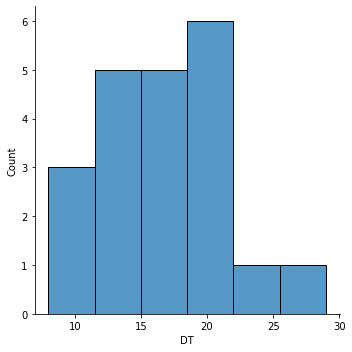

In [8]:
sns.displot(df['DT'])

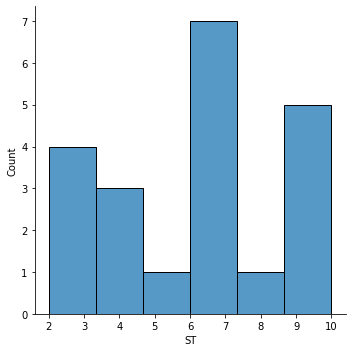

In [9]:
sns.displot(df['ST'])

C:\Users\krush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST', ylabel='DT'>

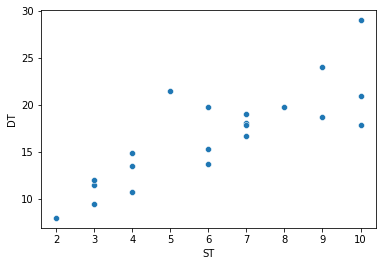

In [10]:
sns.scatterplot(df['ST'], df['DT'])

## Correlation Analysis

In [11]:
df.corr()

,ST,DT
ST,1.000000,0.825997
DT,0.825997,1.000000


<AxesSubplot:>

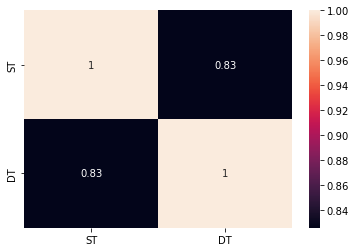

In [12]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='ST', ylabel='DT'>

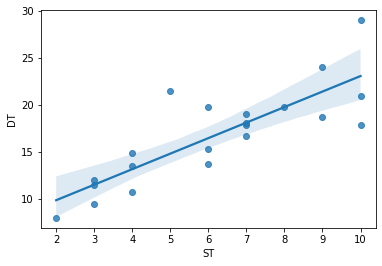

In [36]:
sns.regplot(df['ST'], df['DT'])

## Model 1 (without any transformation)

In [14]:
import statsmodels.formula.api as smf

In [15]:
model1 = smf.ols('DT~ST', data = df).fit()
model1

#### Model Testing

In [25]:
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [28]:
model1.tvalues, model1.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [29]:
print(model1.rsquared, model1.rsquared_adj)

0.6822714748417231 0.6655489208860244


In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        09:37:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2 (Exponential Transformation)

In [17]:
model2 = smf.ols('DT~np.exp(ST)', data = df).fit()

In [23]:
model2.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [31]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        09:37:10   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3 (Reciprocal  Transformation)

In [32]:
model3 = smf.ols('DT~np.reciprocal(ST)', data = df).fit()

In [33]:
model3.params

Intercept            16.790952
np.reciprocal(ST)     0.000000
dtype: float64

In [34]:
model3.summary()

C:\Users\krush\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                nan
Time:                        09:37:22   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.7910      1.107     15.162      0.000      14.481      19.101
np.reciprocal(ST)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 4 (Square  Transformation)

In [38]:
model4 = smf.ols('DT~np.square(ST)', data = df).fit()

In [39]:
model4.params

Intercept        11.237205
np.square(ST)     0.124870
dtype: float64

In [40]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.74e-05
Time:                        09:38:08   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2372      1.196      9.399      0.000       8.735      13.740
np.square(ST)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 5 (Square Root Transformation)

In [41]:
model5 = smf.ols('DT~np.sqrt(ST)', data = df).fit()

In [42]:
model5.params

Intercept     -2.518837
np.sqrt(ST)    7.936591
dtype: float64

In [43]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        09:38:16   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 6 (Log of X Transformation)

In [44]:
model6 = smf.ols('DT~np.log(ST)', data = df).fit()

In [45]:
model6.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [46]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        09:38:24   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 7  (Log of Y Transformation)

In [58]:
model7 = smf.ols('np.log(DT)~ST', data = df).fit()

In [59]:
model7.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [60]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        09:42:56   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 8  (Log of X and Y Transformation)

In [50]:
model8 = smf.ols('np.log(DT)~np.log(ST)', data = df).fit()

In [51]:
model8.params

Intercept     1.741987
np.log(ST)    0.597522
dtype: float64

In [52]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                        09:38:42   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion
From the above models, we find that Model no. 8 gives us the best results in terms of R-squared value = 77.2%.\
Hence we select that model and predict data based on it.

## Prediction of new data (Delivery time)

In [66]:
Sorting_time = pd.Series([1, 11, 5.6])
Sorting_time = pd.DataFrame(Sorting_time, columns=['ST'])
Sorting_time

,ST
0,1.0
1,11.0
2,5.6


In [67]:
Delivery_time = model8.predict(Sorting_time)
Delivery_time

0    1.741987
1    3.174783
2    2.771379
dtype: float64

#### End